In [1]:
from datgan import DATGAN
import datgan

import numpy as np
import pandas as pd
import networkx as nx

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import tensorflow as tf

#tf.config.run_functions_eagerly(True)

In [2]:
df = pd.read_csv('../../data/LTDS/cleaned_del.csv')

In [3]:
df.head()

,gender,age,ethnicity,hh_borough,hh_people,hh_income,hh_carvan,hh_comp
0,male,59,White,Barnet,3,10-15k,3,Couple family
1,female,56,White,Barnet,3,10-15k,3,Couple family
2,female,47,White,Barnet,1,25-35k,1,Single
3,male,63,White,Barnet,3,75-100k,2,Couple family
4,female,56,White,Barnet,3,75-100k,2,Couple family


In [4]:
data_info = {
    'age': {
        'type': 'continuous',
        'bounds': [0, 100],
        'discrete': True
    }
}

# Add the other variables as categorical
for c in df.columns:
    if c not in data_info.keys():
        data_info[c] = {'type': 'categorical'}

In [5]:
graph = nx.DiGraph()

graph.add_edges_from([
    ('age', 'hh_comp'),
    ('gender', 'hh_comp'),
    ('ethnicity', 'hh_people'),
    ('hh_borough', 'hh_comp'),
    ('hh_borough', 'hh_carvan'),
    ('hh_borough', 'hh_income'),
    ('hh_borough', 'ethnicity'),
    ('hh_comp', 'hh_income'),
    ('hh_comp', 'hh_people'),
    ('hh_income', 'hh_carvan'),
    ('hh_people', 'hh_carvan')
])

Preparing advice...
You might want to add the following edges in your DAG (direction not given here):
  - hh_carvan <-> hh_comp
  - age <-> hh_people
  - hh_borough <-> hh_people
  - age <-> hh_borough


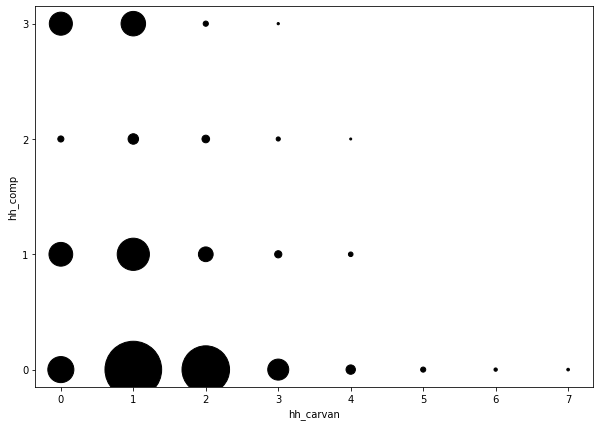

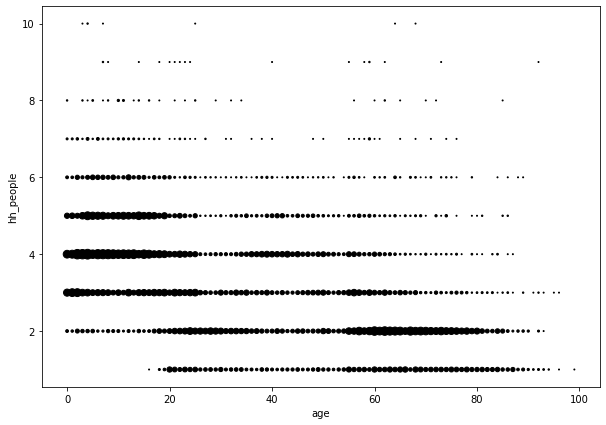

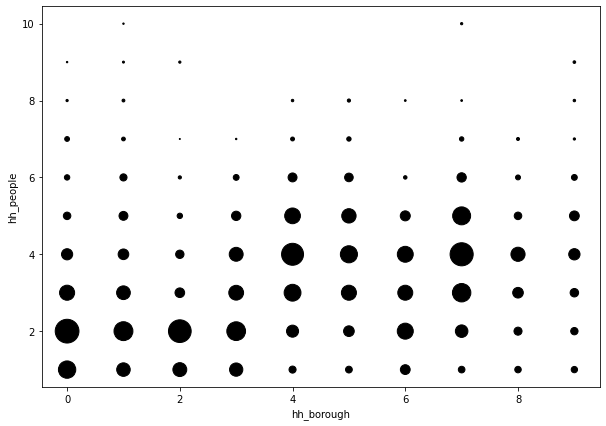

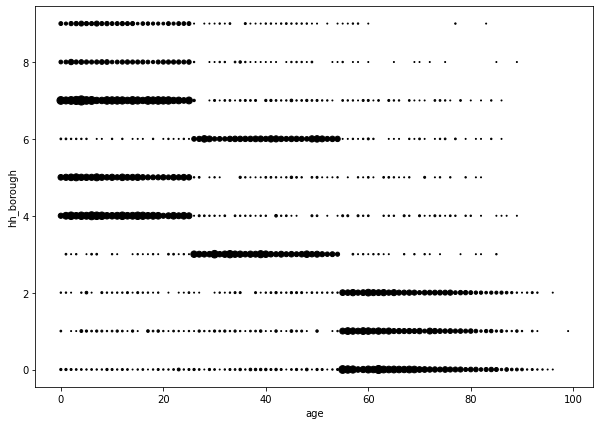

In [6]:
datgan.advise(df, graph, plot_graphs=True)

In [7]:
name = 'ciDATGAN_del'

In [8]:
output_folder = './output/{}/'.format(name)

In [9]:
datgan = DATGAN(output=output_folder,
                loss_function='WGAN',
                conditional_inputs=['age', 'gender', 'hh_borough'],
                batch_size=1112,
                num_epochs=1000)

In [10]:
datgan.fit(df, data_info, graph, preprocessed_data_path='./output/encoded_del')

Preprocessing the data!
Encoding categorical variable "gender"...
Encoding continuous variable "age"...
Encoding categorical variable "ethnicity"...
Encoding categorical variable "hh_borough"...
Encoding categorical variable "hh_people"...
Encoding categorical variable "hh_income"...
Encoding categorical variable "hh_carvan"...
Encoding categorical variable "hh_comp"...
Preprocessed data have been saved in './output/encoded_del'
Start training DATGAN with the WGAN loss (04/07/2022 14:58:17).


Training DATGAN: 100%|██████████| 1000/1000 [09:57<00:00,  1.67it/s]

DATGAN has finished training (04/07/2022 15:08:15) - Training time: 09 minutes and 58 seconds


# Sampling

In [11]:
samp = datgan.sample(len(df), inputs=df[datgan.conditional_inputs], randomize=False)
samp.to_csv('../../data/synthetic/ciDATGAN_del.csv', index=False)

Sampling from DATGAN: 100%|██████████| 10009/10009 [00:00<00:00, 27707.33it/s]


In [14]:
boroughs = ['Camden', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']

In [15]:
count = 1
for b in boroughs:

    tmp = pd.read_csv('../../data/nomis/{}.csv'.format(b))

    print('Sampling for {} ({}/{})'.format(b, count, len(boroughs)))

    samp = datgan.sample(len(tmp), inputs=tmp, randomize=False)

    samp.to_csv('../../data/ciDATGAN_del/{}.csv'.format(b), index=False)

    count += 1

Sampling for Camden (1/10)


Sampling from DATGAN: 100%|██████████| 220338/220338 [00:10<00:00, 21893.28it/s]


Sampling for Westminster (2/10)


Sampling from DATGAN: 100%|██████████| 219396/219396 [00:09<00:00, 22317.26it/s]


Sampling for Kingston upon Thames (3/10)


Sampling from DATGAN: 100%|██████████| 160060/160060 [00:06<00:00, 23724.65it/s]


Sampling for Bromley (4/10)


Sampling from DATGAN: 100%|██████████| 309392/309392 [00:15<00:00, 19949.92it/s]


Sampling for Greenwich (5/10)


Sampling from DATGAN: 100%|██████████| 254557/254557 [00:12<00:00, 20872.98it/s]


Sampling for Havering (6/10)


Sampling from DATGAN: 100%|██████████| 237232/237232 [00:11<00:00, 20943.63it/s]


Sampling for Barnet (7/10)


Sampling from DATGAN: 100%|██████████| 356386/356386 [00:19<00:00, 18739.04it/s]


Sampling for Enfield (8/10)


Sampling from DATGAN: 100%|██████████| 312466/312466 [00:15<00:00, 19594.84it/s]


Sampling for Hillingdon (9/10)


Sampling from DATGAN: 100%|██████████| 273936/273936 [00:13<00:00, 20425.40it/s]


Sampling for Brent (10/10)


Sampling from DATGAN: 100%|██████████| 311215/311215 [00:15<00:00, 19705.12it/s]
